# Horses.csv


In [125]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [126]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [127]:
pip install pandasql

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

## Part 1: EDA

### Data Quality

In [129]:
# Import data
df = pd.read_csv('./Horses.csv')

# Visual check of the data for any obvious errors
pd.options.display.max_columns = None
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,26.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-Jan,NaN,NaN,NaN,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,33.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-Apr,NaN,NaN,NaN,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-Jan,NaN,NaN,NaN,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


Notes on data:
1. Lots of missing data. Will check counts of NaNs per variable 
2. Forecast and Starting Price seem to have been entered as dates, but perhaps should be odds
3. Error in the Scheduled time variable - needs to be removed 
4. MeetingDate is a date - check it's been processed correctly
5. Lots of horse racing terminology used - will need to be careful that variables make sense in context

In [130]:
# Look at coverage of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RaceID              36819 non-null  int64  
 1   HorseID             36819 non-null  int64  
 2   Cloth               36819 non-null  int64  
 3   Stall               36615 non-null  float64
 4   WeightValue         36819 non-null  int64  
 5   JockeyID            36818 non-null  float64
 6   AllowanceValue      1609 non-null   float64
 7   OverweightValue     106 non-null    float64
 8   TrainerID           36819 non-null  int64  
 9   OwnerID             36616 non-null  float64
 10  LastRunDaysFlat     34300 non-null  float64
 11  Age                 36616 non-null  float64
 12  Blinkers            10342 non-null  float64
 13  Hood                0 non-null      float64
 14  Visor               68 non-null     float64
 15  EyeShield           0 non-null      float64
 16  Eyec

Further data cleaning steps:
- We should remove useless variables (all null)
- There seem to be rows that should be removed for data quality purposes e.g. 36814 out of 36819 non-null for DamID - or even 32009 when looking at starting price. The decision of whether to exclude observations will depend upon the business context of the task
- Some variables with very low non-nulls - these could be legitimate (e.g. OverweightValue)


In [131]:
# Remove variables with all null 
df = df.dropna(axis=1, how='all')

In [161]:
month_dic = {'Jan': '1', 
      'Feb': '2', 
      'Mar': '3', 
      'Apr': '4', 
      'May': '5', 
      'Jun': '6', 
      'Jul': '7', 
      'Aug': '8', 
      'Sep': '9', 
      'Oct': '10', 
      'Nov': '11', 
      'Dec': '12'}

def changeOdds(df, oddsVar, newOddsVar):
    '''
    Input: Odds var where dates need to be replaced
        name for new odds variable
    Output: returns dataframe with new odds var
    '''
    
    for i, j in month_dic.items():
        df[oddsVar] =  df[oddsVar].str.replace(i, j)

    df[oddsVar] =  df[oddsVar].str.replace("-", "/")

    df[newOddsVar] = np.where((df[oddsVar].str.contains('/')),
                           pd.to_numeric(df[oddsVar].str.split('/').str[0]) / pd.to_numeric(df[oddsVar].str.split('/').str[1]),
                           df[oddsVar]).astype(float)
    return df

df = changeOdds(df, "StartingPrice", "SP")
df = changeOdds(df, "ForecastPrice", "FP")

#Check it has worked
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Visor,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won,day,month,year,SP,FP
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,26.0,3.0,NaN,NaN,16/1,NaN,NaN,NaN,12/1,SAF,2803520.0,2004880.0,2179351.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,2017-05-02,0,2,5,2017,12.0,16.00
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,NaN,3.0,NaN,NaN,20/1,NaN,NaN,NaN,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,2017-05-02,0,2,5,2017,40.0,20.00
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,NaN,3.0,NaN,NaN,10/1,NaN,NaN,NaN,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,2017-05-02,0,2,5,2017,NaN,10.00
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,33.0,3.0,NaN,NaN,07/4,NaN,NaN,NaN,11/10,SAF,2347111.0,2170013.0,2071137.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,2017-05-02,1,2,5,2017,1.1,1.75
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,24.0,3.0,NaN,NaN,08/1,NaN,NaN,NaN,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,2017-05-02,0,2,5,2017,NaN,8.00


In [132]:
# Look at num of unique values to determine how to visualise
df.nunique()

RaceID                3000
HorseID               6064
Cloth                   30
Stall                   30
WeightValue             39
JockeyID               248
AllowanceValue           9
OverweightValue          5
TrainerID              160
OwnerID               3077
LastRunDaysFlat        384
Age                      9
Blinkers                90
Visor                   16
ForecastPrice           57
StatCourse               9
StatDistance             9
StatCourseDistance       7
StartingPrice           88
Bred                    13
DamID                 4181
SireID                 296
DamSireID              733
Sex                      5
Colour                   9
YearBorn                 7
MeetingID              344
RaceNumber              13
ScheduledTime            1
HorseCount              18
Runners                 17
Going                    7
Weather                 11
Course_Distance         30
RaceType                 1
TrackType                3
Handicap                 2
e

Most granular information - horseID


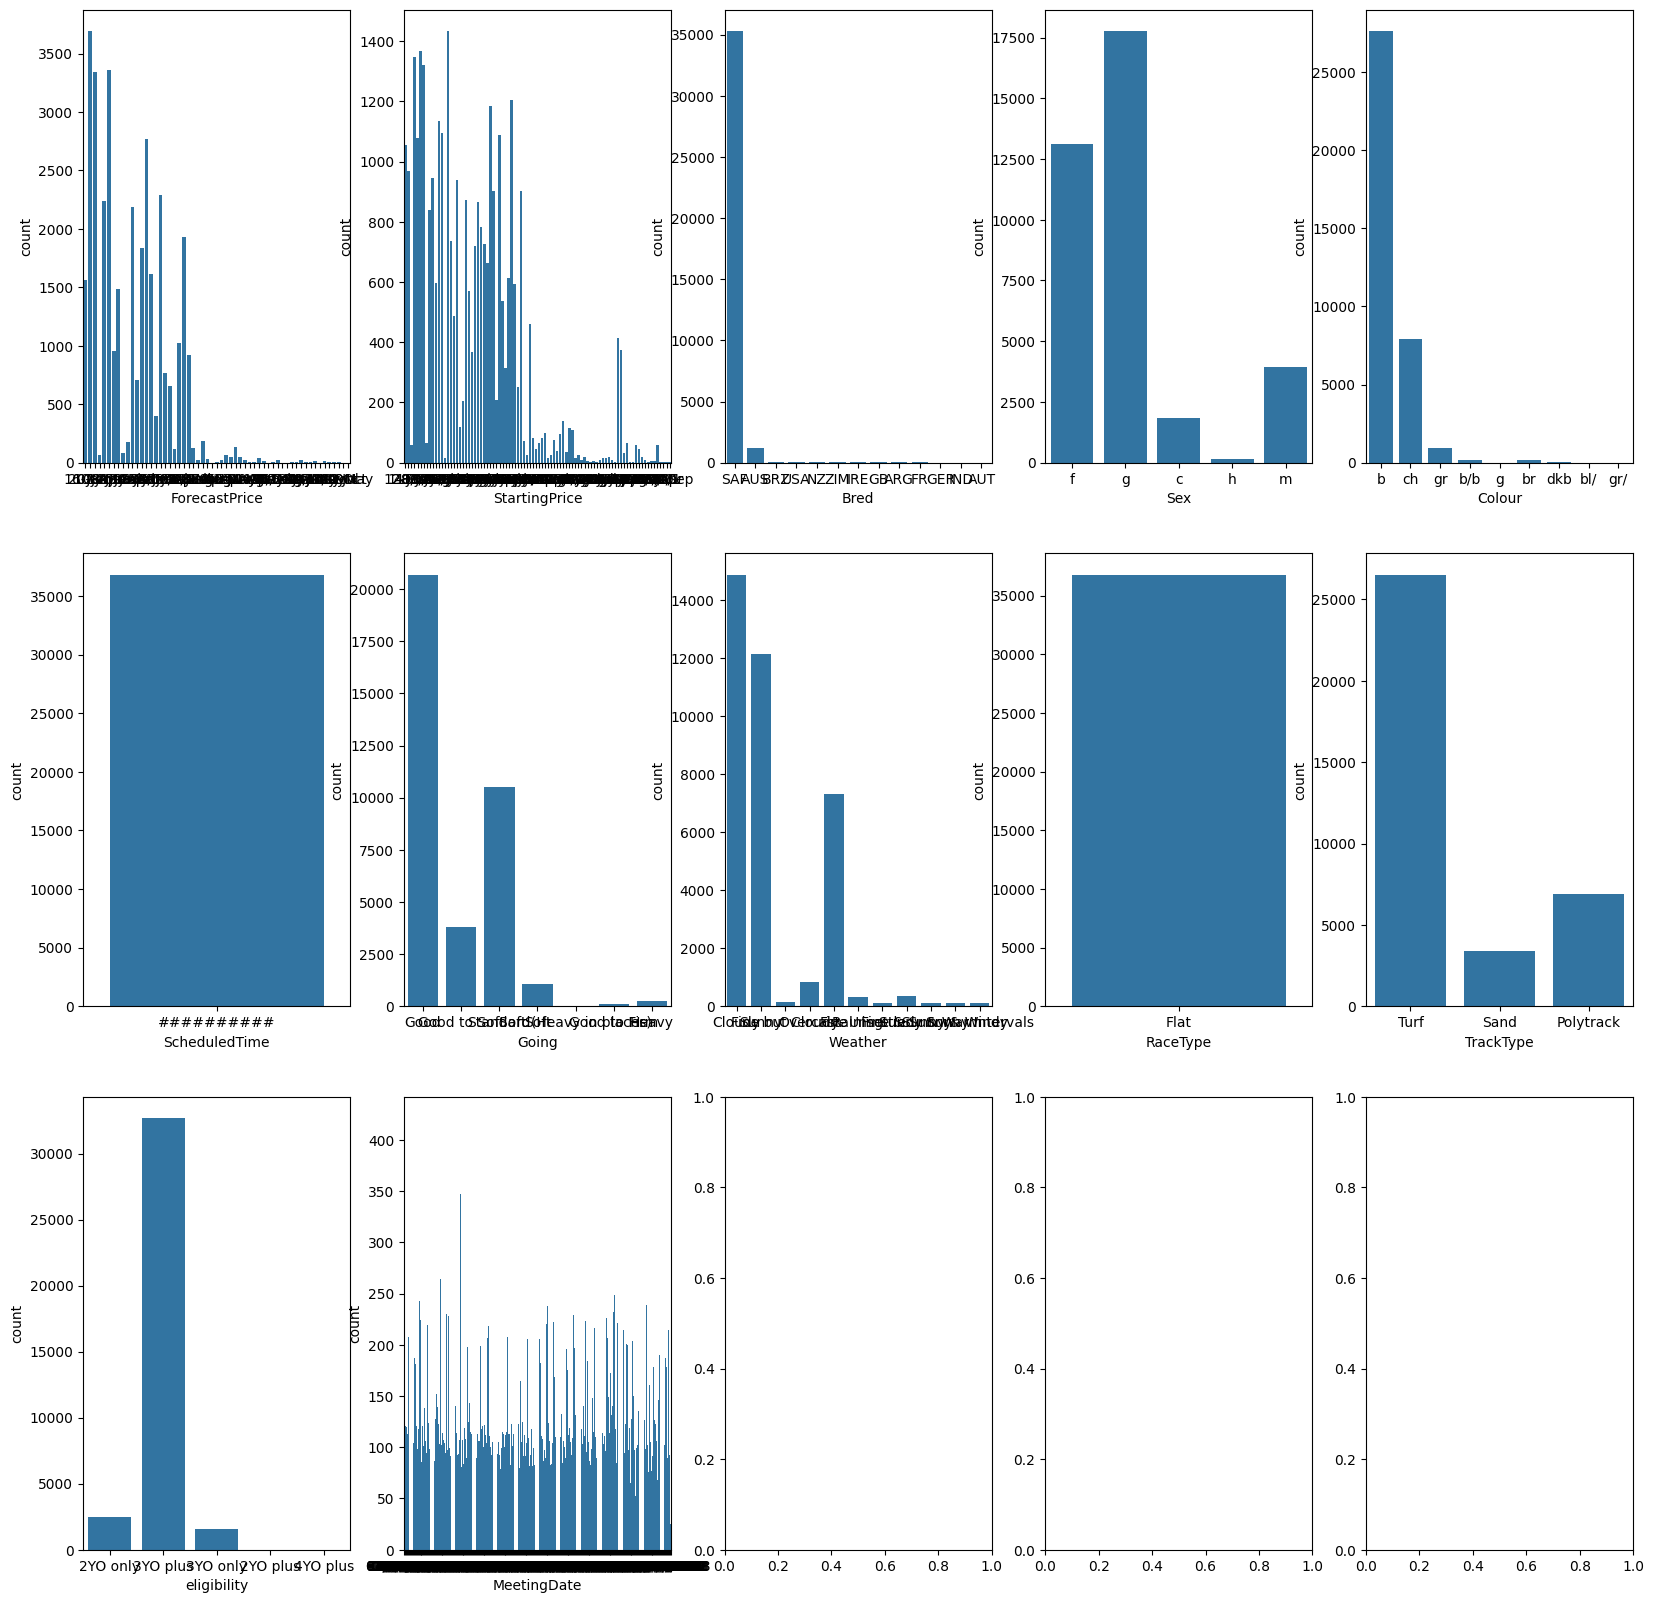

In [133]:
# select the float columns
df_num = df.select_dtypes(include=[np.number])
# select non-numeric columns
df_cat = df.select_dtypes(exclude=[np.number])

# Plot categorical data
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for var, subplot in zip(df_cat.columns.to_list(), ax.flatten()):
    sns.countplot(x=df[var], ax=subplot)

- Should remove ScheduledTime and RaceType
- A bit confused that about Sex variable



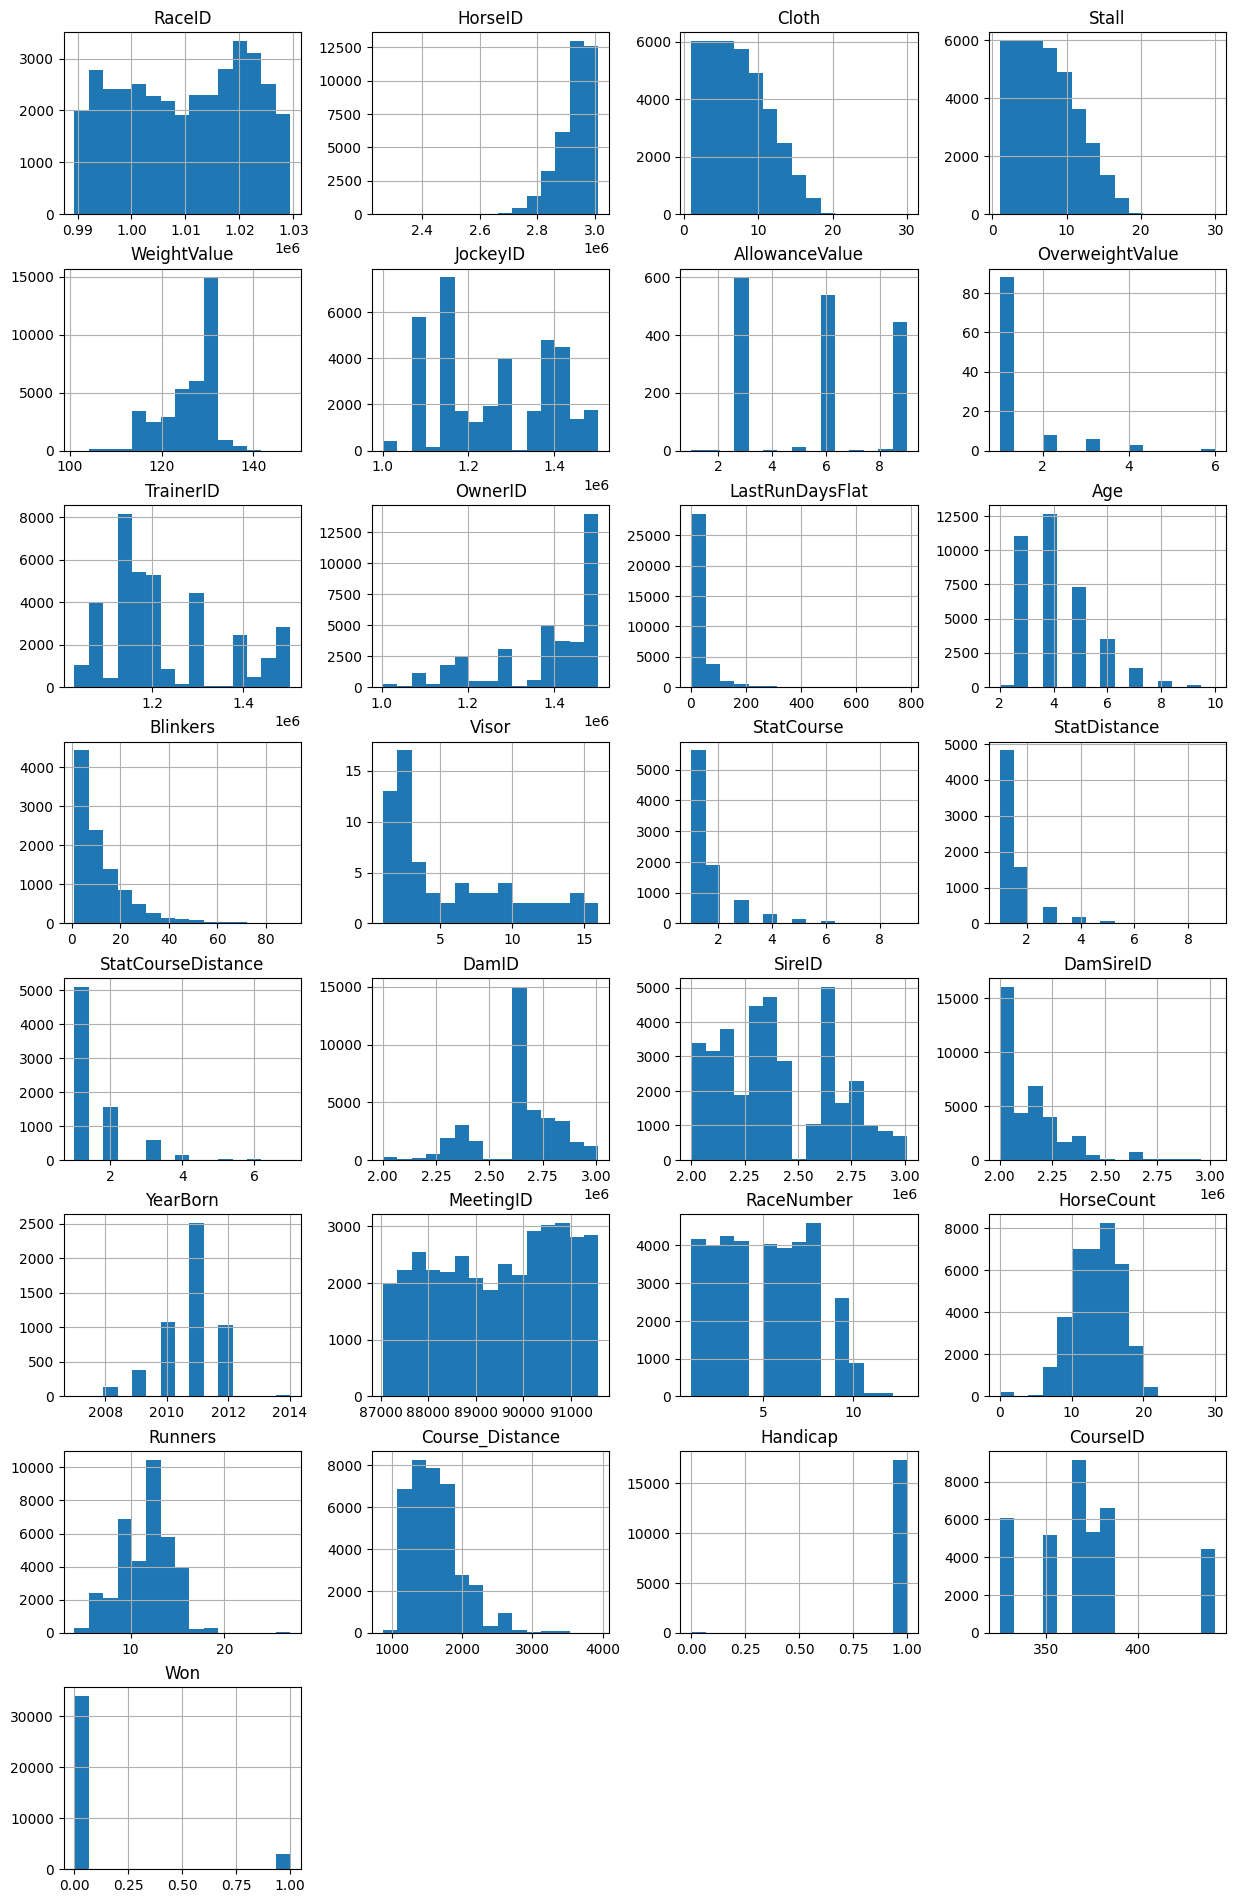

In [134]:
# Remove ScheduledTime and RaceType
df.drop(columns=['ScheduledTime','RaceType'])

# Plot numeric variables
df_num.hist(bins=15, figsize=(15, 30), layout=(10, 4));

- Plenty of IDs
- Handicap is a binary flag 
- Lots of horse racing terminology to get to grips with

<Axes: xlabel='day', ylabel='count'>

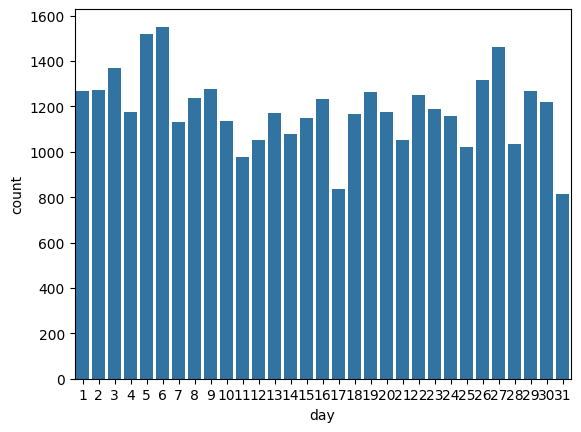

In [135]:
# convert the date column into a datetime object
df['MeetingDate'] = pd.to_datetime(df['MeetingDate'],dayfirst=True)

# extract the day, month, and year components
df['day'] = df['MeetingDate'].dt.day
df['month'] = df['MeetingDate'].dt.month
df['year'] = df['MeetingDate'].dt.year

sns.countplot(x=df['day'])


- Day looks like a sesnible distribution

<Axes: xlabel='month', ylabel='count'>

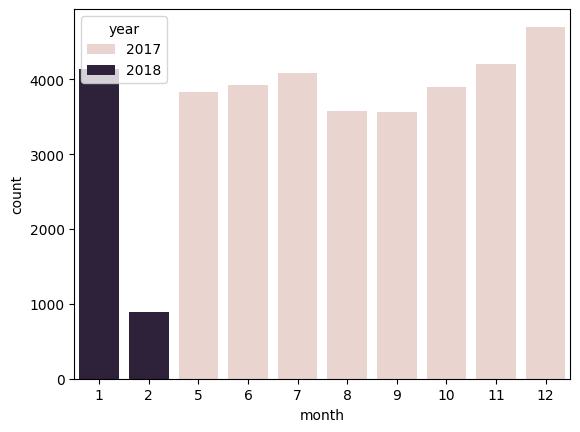

In [136]:
sns.countplot(x=df['month'], hue=df['year'])

- Looks like data was collected from May 2017 to Feb 2018 (is this the racing season? or is this a data quality issue?)

## Part 2: Dimensional Modelling

1. Select the business process:
    Not sure what exactly is desired from this data
    I wil assume that we are wanting to see if there are any factors in deciding if a horse wins a race
2. Select the grain:
    The most granular piece of information is each horse in each race and whether it won or not
3. Dimensions should follow from the various IDs we have on the dataset
    Need to as Who, What, Where, When 
    

In [137]:
df.columns.to_list()

['RaceID',
 'HorseID',
 'Cloth',
 'Stall',
 'WeightValue',
 'JockeyID',
 'AllowanceValue',
 'OverweightValue',
 'TrainerID',
 'OwnerID',
 'LastRunDaysFlat',
 'Age',
 'Blinkers',
 'Visor',
 'ForecastPrice',
 'StatCourse',
 'StatDistance',
 'StatCourseDistance',
 'StartingPrice',
 'Bred',
 'DamID',
 'SireID',
 'DamSireID',
 'Sex',
 'Colour',
 'YearBorn',
 'MeetingID',
 'RaceNumber',
 'ScheduledTime',
 'HorseCount',
 'Runners',
 'Going',
 'Weather',
 'Course_Distance',
 'RaceType',
 'TrackType',
 'Handicap',
 'eligibility',
 'CourseID',
 'MeetingDate',
 'Won',
 'day',
 'month',
 'year']

In [138]:
# Define the dimensions
print('Number of unique HorseID is {}'.format(df['HorseID'].nunique()))

sql = """
    SELECT DISTINCT 
        HorseID
        , YearBorn
        , DamID
        , SireID
        , DamSireID
        , Sex
        , Colour
        , Bred
    FROM df;
"""
dimHorse = ps.sqldf(sql)
dimHorse.info()


Number of unique HorseID is 6064
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HorseID    6064 non-null   int64  
 1   YearBorn   736 non-null    float64
 2   DamID      6062 non-null   float64
 3   SireID     6062 non-null   float64
 4   DamSireID  6062 non-null   float64
 5   Sex        6062 non-null   object 
 6   Colour     6062 non-null   object 
 7   Bred       6064 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 379.1+ KB


In [139]:
print('Number of unique RaceID is {}'.format(df['RaceID'].nunique()))

sql = """
    SELECT DISTINCT 
        RaceID
        , RaceNumber
        , ScheduledTime
        , Runners
        , HorseCount
        , Going
        , Weather
        , Course_Distance
        , TrackType
    FROM df;
"""
dimRace = ps.sqldf(sql)
dimRace.info()

Number of unique RaceID is 3000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RaceID           3000 non-null   int64  
 1   RaceNumber       3000 non-null   int64  
 2   ScheduledTime    3000 non-null   object 
 3   Runners          2999 non-null   float64
 4   HorseCount       3000 non-null   int64  
 5   Going            2965 non-null   object 
 6   Weather          2965 non-null   object 
 7   Course_Distance  3000 non-null   int64  
 8   TrackType        2993 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 211.1+ KB


In [140]:
print('Number of unique MeetingID is {}'.format(df['MeetingID'].nunique()))

sql = """
    SELECT DISTINCT 
        MeetingID
        , MeetingDate
        , Day
        , Month
        , Year
    FROM df;
"""
dimMeeting = ps.sqldf(sql)
dimMeeting.info()

Number of unique MeetingID is 344
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MeetingID    344 non-null    int64 
 1   MeetingDate  344 non-null    object
 2   day          344 non-null    int64 
 3   month        344 non-null    int64 
 4   year         344 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 13.6+ KB


In [141]:
# Not best practice - need to consider the fact that owners/trainers change over time 

print('Number of unique OwnerID is {}'.format(df['OwnerID'].nunique()))

sql = """
    SELECT DISTINCT 
        HorseID
        , MeetingID
        , OwnerID
        , JockeyID
        , TrainerID
    FROM df;
"""
dimChanges = ps.sqldf(sql)
dimChanges.info()

Number of unique OwnerID is 3077
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HorseID    36819 non-null  int64  
 1   MeetingID  36819 non-null  int64  
 2   OwnerID    36616 non-null  float64
 3   JockeyID   36818 non-null  float64
 4   TrainerID  36819 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [142]:
sql = """
    SELECT DISTINCT
        HorseID
        , RaceID
        , MeetingID
        , Won
        , ForecastPrice
        , StartingPrice
        , Handicap
        , eligibility
        , StatCourse
        , StatDistance
        , StatCourseDistance
    FROM df;
"""
factTable = ps.sqldf(sql)
factTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HorseID             36819 non-null  int64  
 1   RaceID              36819 non-null  int64  
 2   MeetingID           36819 non-null  int64  
 3   Won                 36819 non-null  int64  
 4   ForecastPrice       35092 non-null  object 
 5   StartingPrice       32009 non-null  object 
 6   Handicap            17406 non-null  float64
 7   eligibility         36768 non-null  object 
 8   StatCourse          8832 non-null   float64
 9   StatDistance        7128 non-null   float64
 10  StatCourseDistance  7456 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 3.1+ MB


Dimensional Model consists of 4 dimensions and on fact table:
- dimHorse
- dimRace
- dimMeeting
- dimChanges
- factTable


Dimensional model needs further work. 
- Need to consider how relationships change overtime, and which table structure suits that best:
- A better understanding of the horse terms will mean better table structures

## Part 3: Analytics/Reporting:


<Axes: xlabel='Sex'>

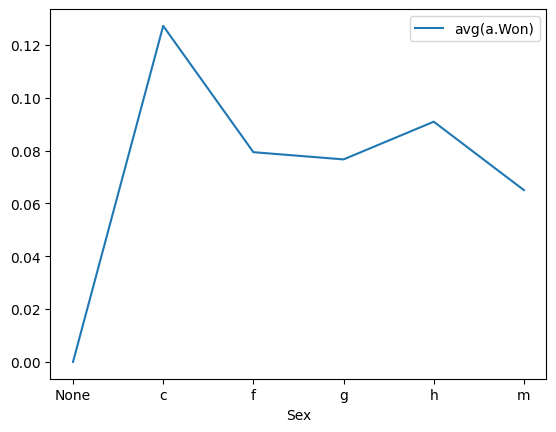

In [119]:
# Plot win rate by Sex

sql = """
    SELECT b.Sex 
        , avg(a.Won) AS WinRate
    FROM factTable AS a
    LEFT JOIN dimHorse AS b 
        ON a.HorseId = b.HorseID
    GROUP BY 1
"""
ps.sqldf(sql).plot(x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

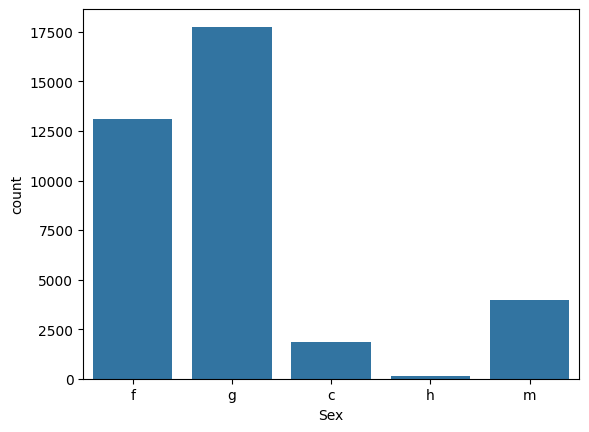

In [120]:
# Plot count of Sex
sns.countplot(x=df['Sex'])

Colts have a much higher winrate, even though there are relatively few of them 

<Axes: xlabel='winRate', ylabel='countOfRaces'>

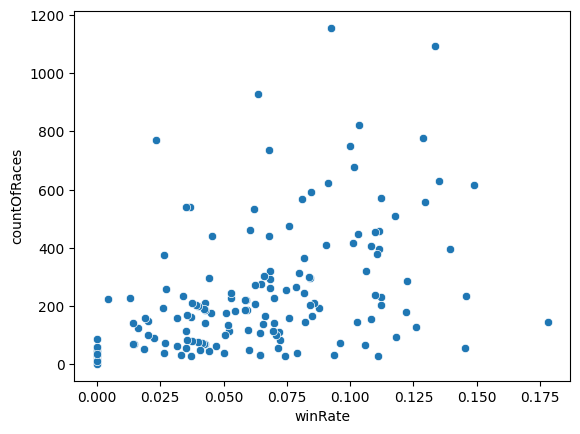

In [157]:
# Is there a connection between Trainer ID and winner?

sql = """
    SELECT b.TrainerID
        , count(1)  AS countOfRaces
        , avg(a.Won) AS winRate
    FROM factTable AS a
    LEFT JOIN dimChanges AS b 
        ON a.HorseId = b.HorseID
        AND a.MeetingID = b.MeetingID
    GROUP BY 1
    ORDER BY 3 DESC
"""
trainer = ps.sqldf(sql)
sns.scatterplot(data=trainer, x="winRate", y="countOfRaces")

In [158]:
# Im interested in the trainer on the far right ( low muber of races, but very high win rate)
sql = """
    SELECT * FROM trainer
    WHERE winRate > 0.175
"""
ps.sqldf(sql)

,TrainerID,countOfRaces,winRate
0,1101907,146,0.178082


In [159]:
# Im also interested in the trainer on the top right (high win rate and high number of races)
sql = """
    SELECT * FROM trainer
    WHERE winRate > 0.125 AND countOfRaces > 1000
"""
ps.sqldf(sql)

,TrainerID,countOfRaces,winRate
0,1140076,1094,0.133455


Further points for analysis:
- odds variables' relationship with Won
- whether specific Dam/Sires produce better horses
- whether some horses prefer different types of race (length, type etc.)